# P-value log-log calibration plots

Per reviewer's request

In [31]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('/home/ubuntu/Github/scrna-parameter-estimation/')
import memento

In [3]:
data_path = '/home/ubuntu/Data/simulation/'

In [22]:
def run_memento_1d(file):
    adata = sc.read(data_path + file)

    adata.obs['q'] = 0.07

    memento.setup_memento(adata, q_column='q', trim_percent=0.1)

    memento.create_groups(adata, label_columns=['condition', 'group'])
    memento.compute_1d_moments(adata, min_perc_group=.9)

    samples = memento.get_groups(adata)

    treatment = (samples[['condition']]=='stim')

    covariate = (samples[['group']]=='B')

    memento.ht_1d_moments(
        adata, 
        covariate=covariate,
        treatment=treatment,
        num_boot=10000, 
        verbose=1,
        num_cpus=10,
        resample_rep=False,
        approx=False)

    return memento.get_1d_ht_result(adata)

In [23]:
de = run_memento_1d('de/anndata.h5ad')
de['is_de'] = adata.var['is_de'].values

/tmp/ipykernel_14073/2229247313.py:6: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(theoretical), -np.log(pv), s=1)


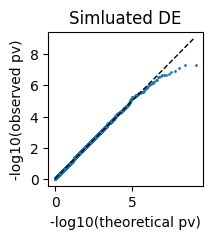

In [35]:
plt.figure(figsize=(2,2))
pv = de.query('~is_de')['de_pval'].values
pv = np.sort(pv)
theoretical = np.linspace(0, 1, pv.shape[0])
plt.plot([0, 9], [0, 9], '--', color='k', linewidth=1)
plt.scatter(-np.log(theoretical), -np.log(pv), s=1)
plt.title('Simluated DM')
plt.xlabel('-log10(theoretical pv)')
plt.ylabel('-log10(observed pv)')
plt.savefig('log_de_calibration.png', bbox_inches='tight', dpi=300)

### DV

In [ ]:
dv = run_memento_1d('dv/high_expr_anndata.h5ad')

In [42]:
dv_adata = sc.read(data_path + 'dv/high_expr_anndata.h5ad')

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [46]:
dv = dv.set_index('gene').join(dv_adata.var)

(array([1522.,  857.,  766.,  643.,  611.,  569.,  557.,  532.,  537.,
         526.]),
 array([5.70877276e-05, 9.99913850e-02, 1.99925682e-01, 2.99859979e-01,
        3.99794277e-01, 4.99728574e-01, 5.99662871e-01, 6.99597168e-01,
        7.99531466e-01, 8.99465763e-01, 9.99400060e-01]),
 <BarContainer object of 10 artists>)

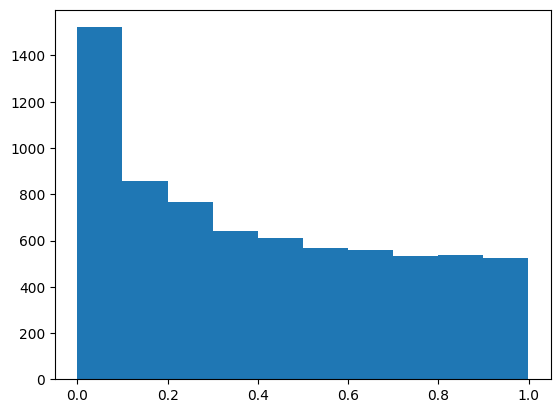

In [49]:
plt.hist(pv)

### DC